
=== Multi-Horizon Forecast Setup for Aave ===
Aave final train shape: (132, 23), test shape: (33, 23)


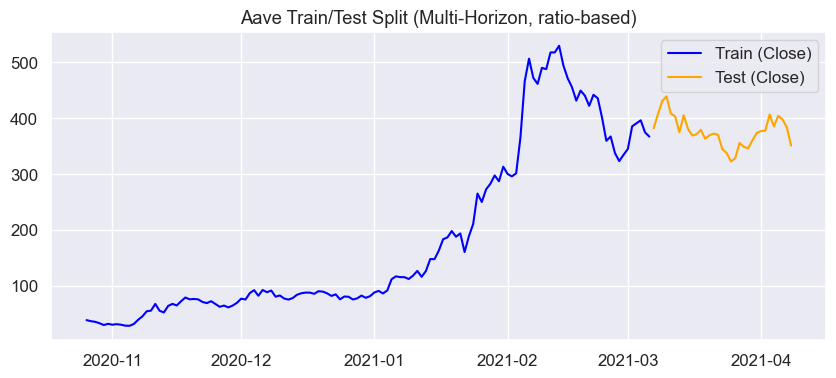

Saved Aave multi-horizon train data to: aave_train_multi.csv
Saved Aave multi-horizon test data  to: aave_test_multi.csv

=== Multi-Horizon Forecast Setup for BinanceCoin ===
BinanceCoin final train shape: (1065, 23), test shape: (267, 23)


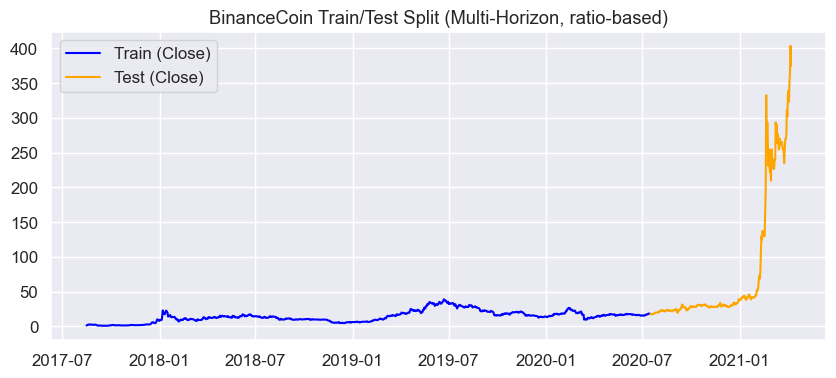

Saved BinanceCoin multi-horizon train data to: binancecoin_train_multi.csv
Saved BinanceCoin multi-horizon test data  to: binancecoin_test_multi.csv

=== Multi-Horizon Forecast Setup for Bitcoin ===
Bitcoin final train shape: (2304, 23), test shape: (577, 23)


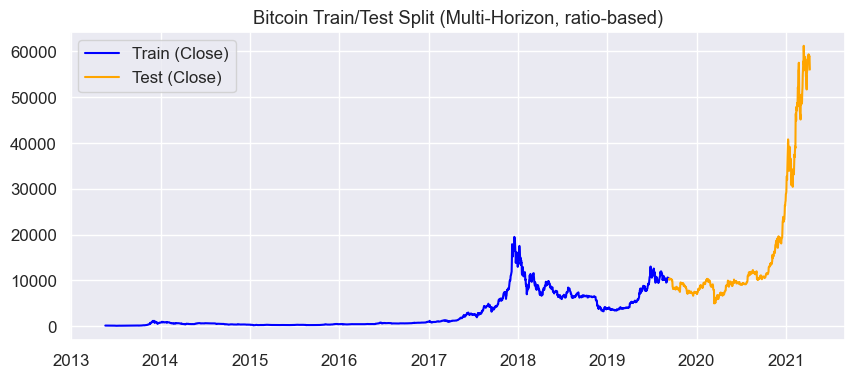

Saved Bitcoin multi-horizon train data to: bitcoin_train_multi.csv
Saved Bitcoin multi-horizon test data  to: bitcoin_test_multi.csv

=== Multi-Horizon Forecast Setup for Cardano ===
Cardano final train shape: (1011, 23), test shape: (253, 23)


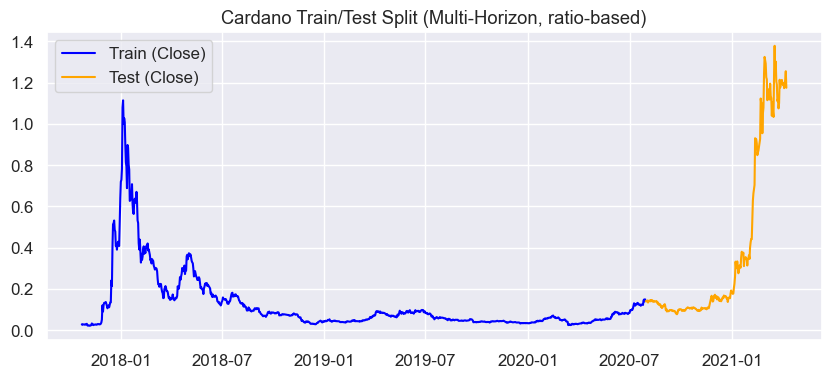

Saved Cardano multi-horizon train data to: cardano_train_multi.csv
Saved Cardano multi-horizon test data  to: cardano_test_multi.csv

=== Multi-Horizon Forecast Setup for ChainLink ===
ChainLink final train shape: (1020, 23), test shape: (255, 23)


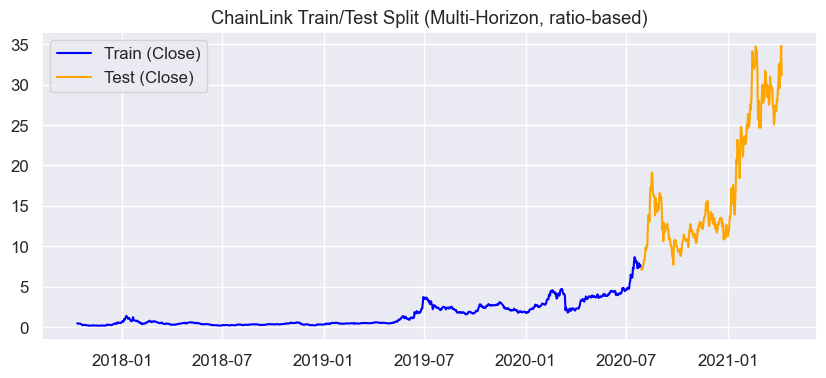

Saved ChainLink multi-horizon train data to: chainlink_train_multi.csv
Saved ChainLink multi-horizon test data  to: chainlink_test_multi.csv

=== Multi-Horizon Forecast Setup for Cosmos ===
Cosmos final train shape: (588, 23), test shape: (147, 23)


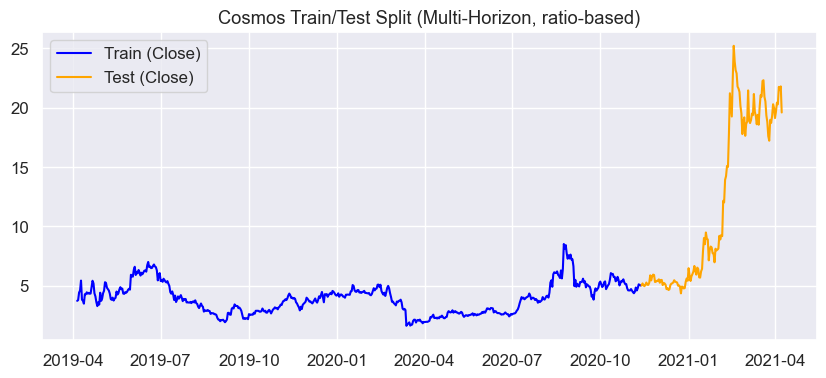

Saved Cosmos multi-horizon train data to: cosmos_train_multi.csv
Saved Cosmos multi-horizon test data  to: cosmos_test_multi.csv

=== Multi-Horizon Forecast Setup for CryptocomCoin ===
CryptocomCoin final train shape: (660, 23), test shape: (165, 23)


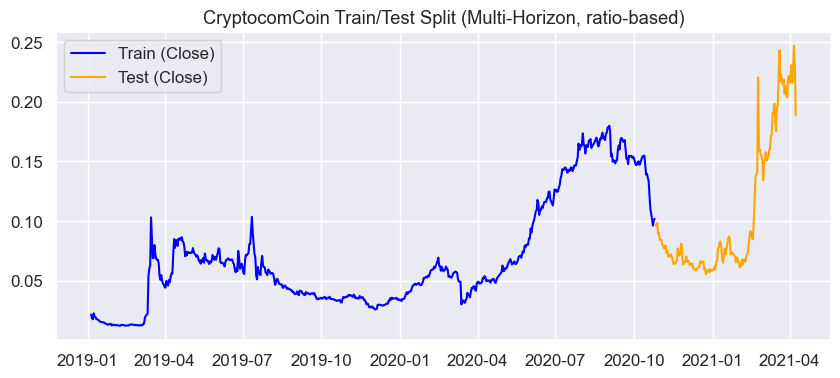

Saved CryptocomCoin multi-horizon train data to: cryptocomcoin_train_multi.csv
Saved CryptocomCoin multi-horizon test data  to: cryptocomcoin_test_multi.csv

=== Multi-Horizon Forecast Setup for Dogecoin ===
Dogecoin final train shape: (2120, 23), test shape: (530, 23)


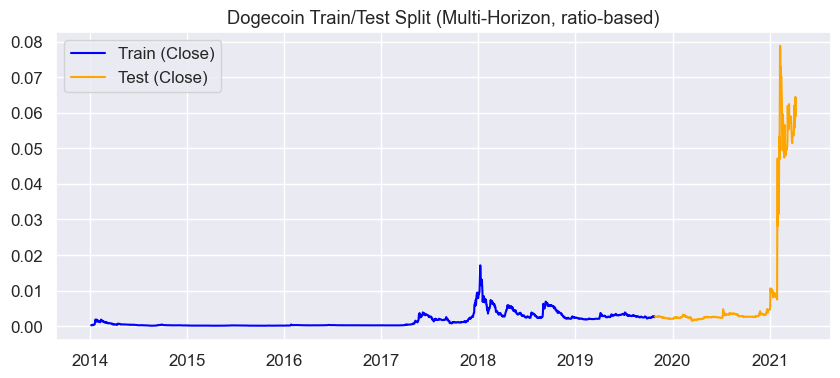

Saved Dogecoin multi-horizon train data to: dogecoin_train_multi.csv
Saved Dogecoin multi-horizon test data  to: dogecoin_test_multi.csv

=== Multi-Horizon Forecast Setup for EOS ===
EOS final train shape: (1084, 23), test shape: (272, 23)


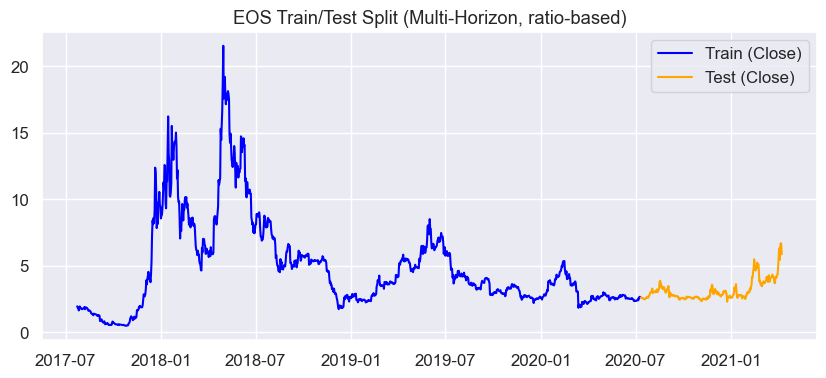

Saved EOS multi-horizon train data to: eos_train_multi.csv
Saved EOS multi-horizon test data  to: eos_test_multi.csv

=== Multi-Horizon Forecast Setup for Ethereum ===
Ethereum final train shape: (1640, 23), test shape: (410, 23)


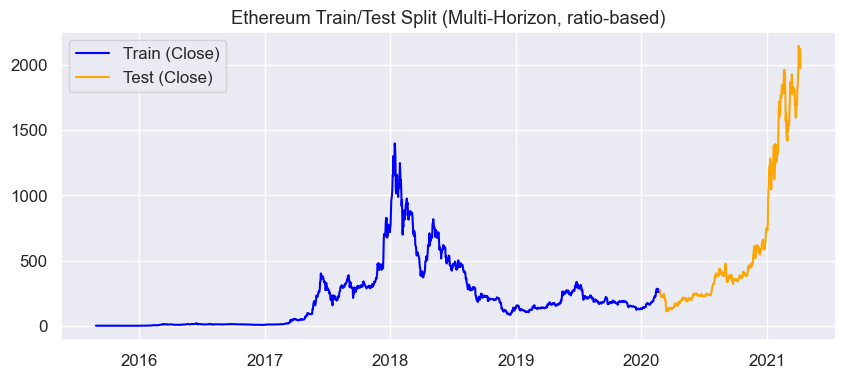

Saved Ethereum multi-horizon train data to: ethereum_train_multi.csv
Saved Ethereum multi-horizon test data  to: ethereum_test_multi.csv

=== Multi-Horizon Forecast Setup for Iota ===
Iota final train shape: (1099, 23), test shape: (275, 23)


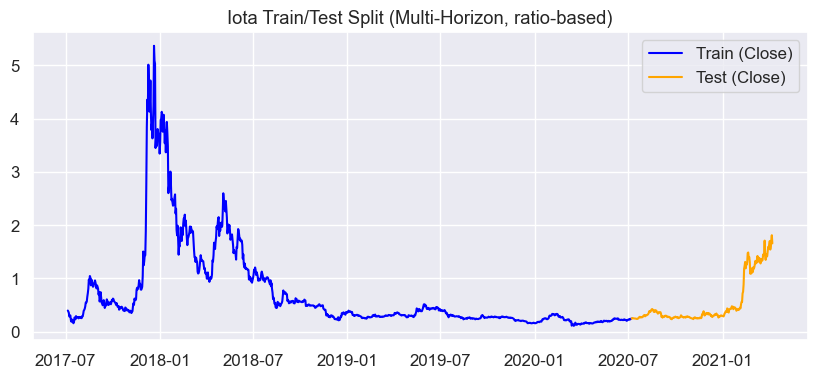

Saved Iota multi-horizon train data to: iota_train_multi.csv
Saved Iota multi-horizon test data  to: iota_test_multi.csv

=== Multi-Horizon Forecast Setup for Litecoin ===
Litecoin final train shape: (2304, 23), test shape: (577, 23)


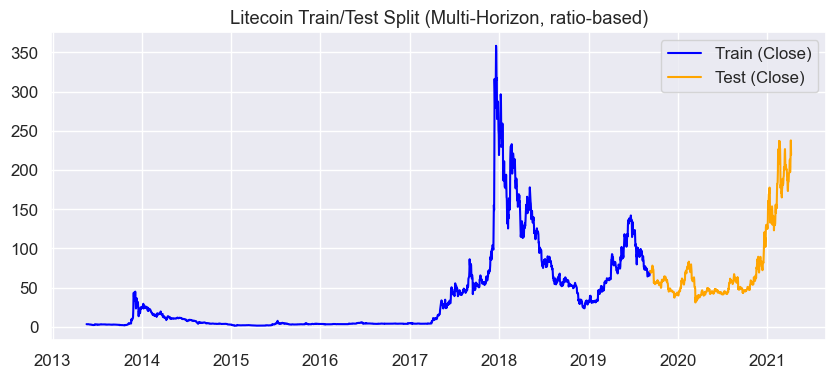

Saved Litecoin multi-horizon train data to: litecoin_train_multi.csv
Saved Litecoin multi-horizon test data  to: litecoin_test_multi.csv

=== Multi-Horizon Forecast Setup for Monero ===
Monero final train shape: (1993, 23), test shape: (499, 23)


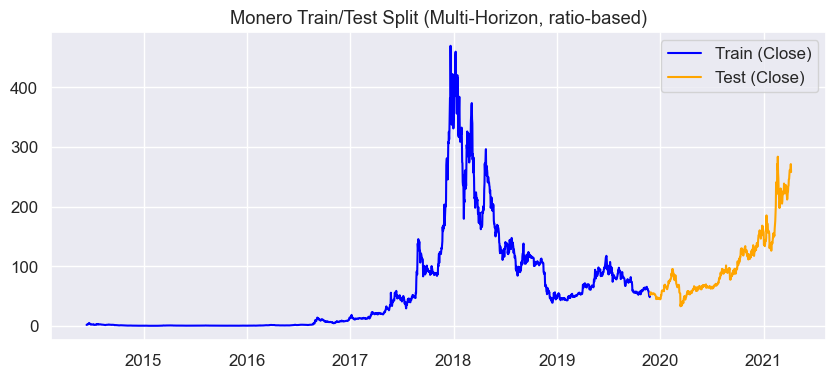

Saved Monero multi-horizon train data to: monero_train_multi.csv
Saved Monero multi-horizon test data  to: monero_test_multi.csv

=== Multi-Horizon Forecast Setup for NEM ===
NEM final train shape: (1742, 23), test shape: (436, 23)


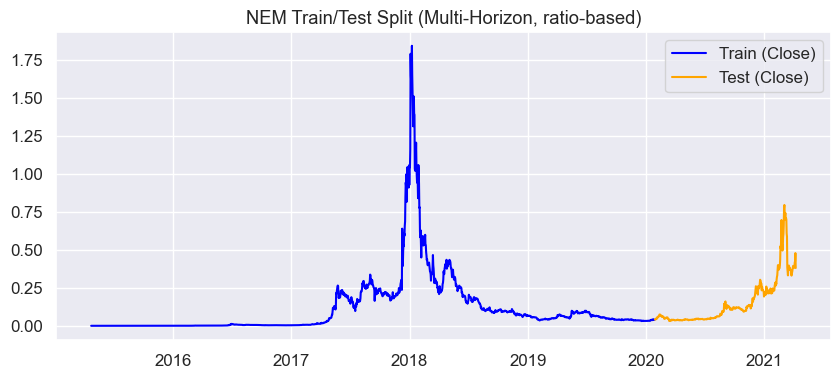

Saved NEM multi-horizon train data to: nem_train_multi.csv
Saved NEM multi-horizon test data  to: nem_test_multi.csv

=== Multi-Horizon Forecast Setup for Polkadot ===
Polkadot final train shape: (168, 23), test shape: (42, 23)


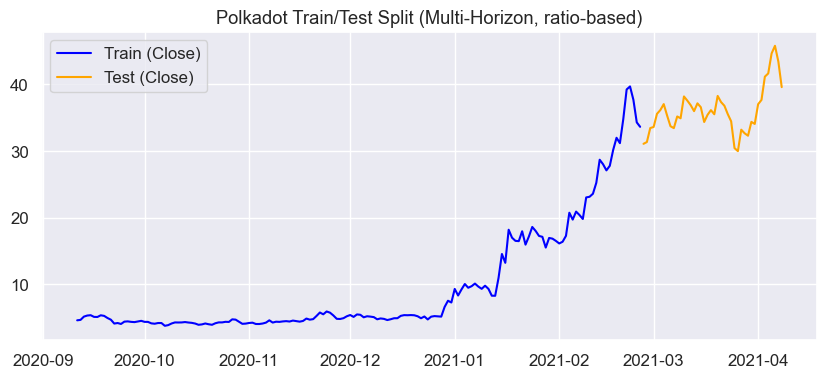

Saved Polkadot multi-horizon train data to: polkadot_train_multi.csv
Saved Polkadot multi-horizon test data  to: polkadot_test_multi.csv

=== Multi-Horizon Forecast Setup for Solana ===
Solana final train shape: (273, 23), test shape: (69, 23)


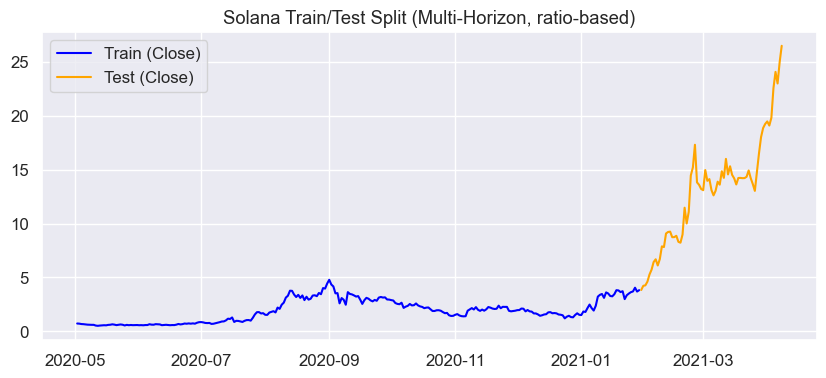

Saved Solana multi-horizon train data to: solana_train_multi.csv
Saved Solana multi-horizon test data  to: solana_test_multi.csv

=== Multi-Horizon Forecast Setup for Stellar ===
Stellar final train shape: (1933, 23), test shape: (484, 23)


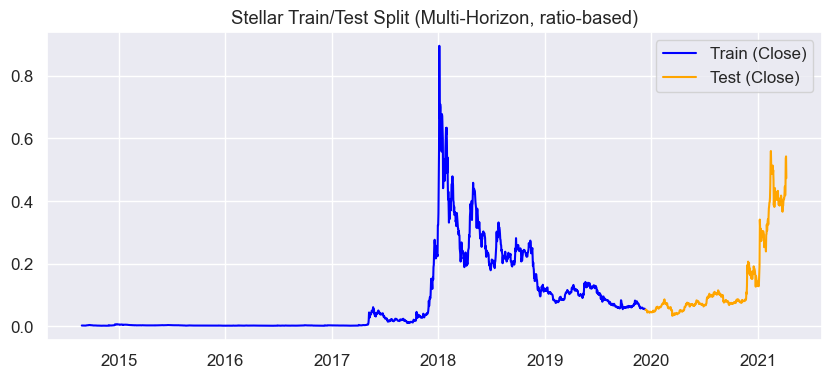

Saved Stellar multi-horizon train data to: stellar_train_multi.csv
Saved Stellar multi-horizon test data  to: stellar_test_multi.csv

=== Multi-Horizon Forecast Setup for Tether ===
Tether final train shape: (1508, 23), test shape: (377, 23)


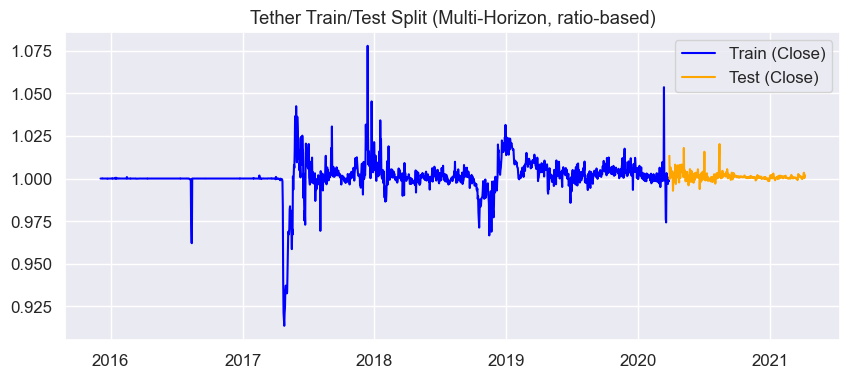

Saved Tether multi-horizon train data to: tether_train_multi.csv
Saved Tether multi-horizon test data  to: tether_test_multi.csv

=== Multi-Horizon Forecast Setup for Tron ===
Tron final train shape: (1025, 23), test shape: (257, 23)


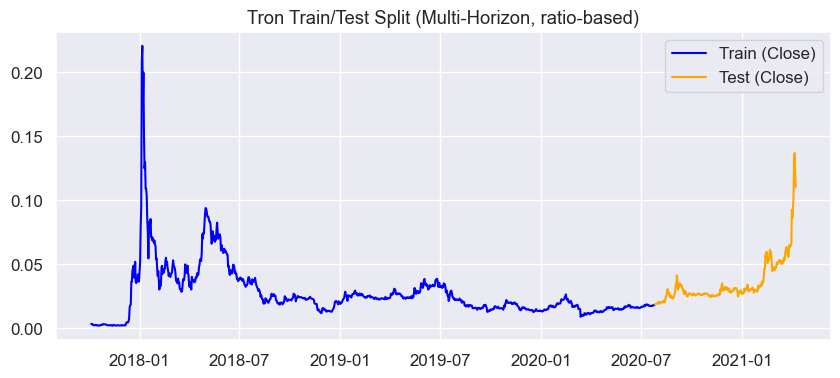

Saved Tron multi-horizon train data to: tron_train_multi.csv
Saved Tron multi-horizon test data  to: tron_test_multi.csv

=== Multi-Horizon Forecast Setup for Uniswap ===
Uniswap final train shape: (145, 23), test shape: (37, 23)


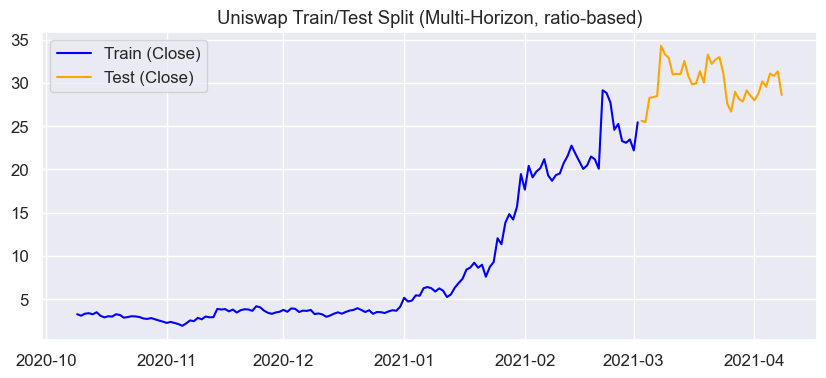

Saved Uniswap multi-horizon train data to: uniswap_train_multi.csv
Saved Uniswap multi-horizon test data  to: uniswap_test_multi.csv

=== Multi-Horizon Forecast Setup for USDCoin ===
USDCoin final train shape: (713, 23), test shape: (179, 23)


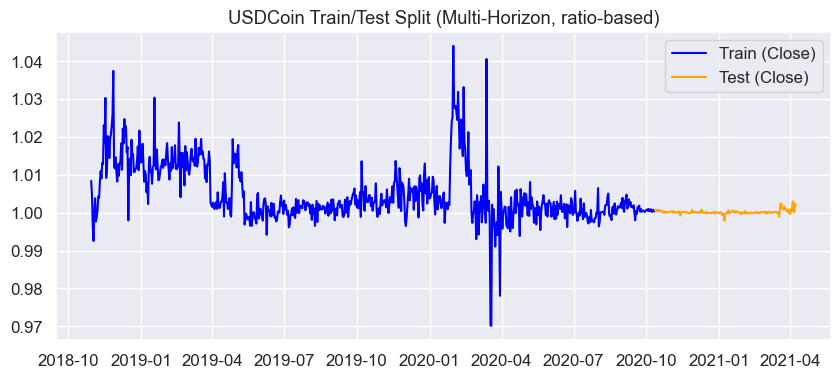

Saved USDCoin multi-horizon train data to: usdcoin_train_multi.csv
Saved USDCoin multi-horizon test data  to: usdcoin_test_multi.csv

=== Multi-Horizon Forecast Setup for WrappedBitcoin ===
WrappedBitcoin final train shape: (622, 23), test shape: (156, 23)


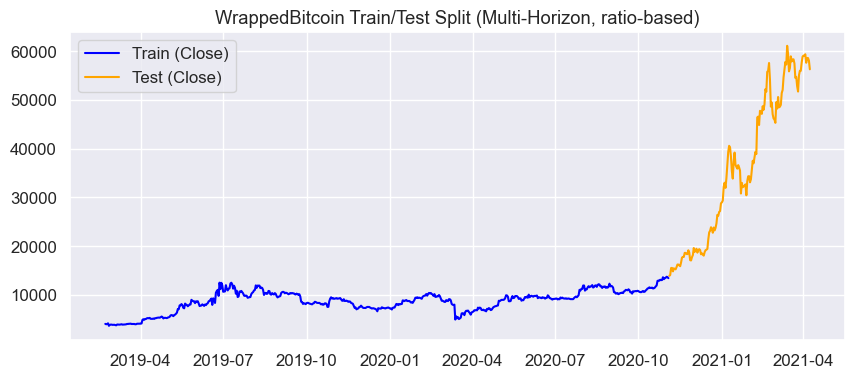

Saved WrappedBitcoin multi-horizon train data to: wrappedbitcoin_train_multi.csv
Saved WrappedBitcoin multi-horizon test data  to: wrappedbitcoin_test_multi.csv

=== Multi-Horizon Forecast Setup for XRP ===
XRP final train shape: (2226, 23), test shape: (557, 23)


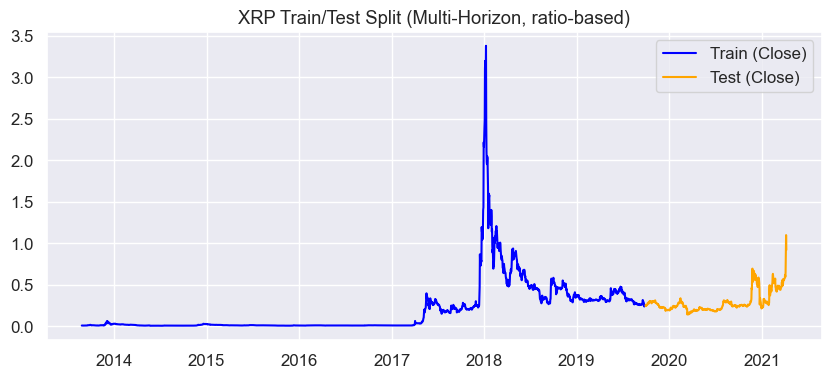

Saved XRP multi-horizon train data to: xrp_train_multi.csv
Saved XRP multi-horizon test data  to: xrp_test_multi.csv


In [7]:
# 03_multihorizon_forecast_setup_ratio.ipynb

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(font_scale=1.1)

DATA_FOLDER = '../data'

all_coins = [
    "Aave",
    "BinanceCoin",
    "Bitcoin",
    "Cardano",
    "ChainLink",
    "Cosmos",
    "CryptocomCoin",
    "Dogecoin",
    "EOS",
    "Ethereum",
    "Iota",
    "Litecoin",
    "Monero",
    "NEM",
    "Polkadot",
    "Solana",
    "Stellar",
    "Tether",
    "Tron",
    "Uniswap",
    "USDCoin",
    "WrappedBitcoin",
    "XRP"
]

# We'll define these horizons
horizons = [1, 7, 30, 90]  # 1D, 7D, 1M, 3M

for coin in all_coins:
    print(f"\n=== Multi-Horizon Forecast Setup for {coin} ===")
    features_csv = f"coin_{coin}_features.csv"
    features_path = os.path.join(DATA_FOLDER, features_csv)
    if not os.path.exists(features_path):
        print(f"Features file not found: {features_path}, skipping...")
        continue

    df = pd.read_csv(features_path, parse_dates=['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)

    if len(df) < 50:
        print(f"{coin}: Only {len(df)} rows. Too small; skipping coin.")
        continue

    # 1. Create multiple horizon columns
    for h in horizons:
        col_name = f"Close_t+{h}"
        if h > len(df):
            # coin doesn't have enough data for that shift
            print(f"{coin}: Not enough data ({len(df)}) for horizon {h}, skipping horizon.")
            df[col_name] = np.nan
        else:
            df[col_name] = df['Close'].shift(-h)

    # 2. Drop rows with NAs from shifting
    df.dropna(inplace=True)
    if len(df) == 0:
        print(f"{coin}: No rows left after shifting for {horizons}. Skipping coin.")
        continue

    # 3. Ratio-based train/test split (80% train, 20% test)
    split_idx = int(len(df) * 0.8)
    train_df = df.iloc[:split_idx].copy()
    test_df  = df.iloc[split_idx:].copy()

    if len(train_df) < 10 or len(test_df) < 1:
        print(f"{coin}: Not enough train ({len(train_df)}) or test ({len(test_df)}) data, skipping coin.")
        continue

    print(f"{coin} final train shape: {train_df.shape}, test shape: {test_df.shape}")

    # 4. Quick Plot
    plt.figure(figsize=(10,4))
    plt.plot(train_df.index, train_df['Close'], label='Train (Close)', color='blue')
    plt.plot(test_df.index,  test_df['Close'],  label='Test (Close)',  color='orange')
    plt.title(f'{coin} Train/Test Split (Multi-Horizon, ratio-based)')
    plt.legend()
    plt.show()

    # 5. Save
    train_csv = f"{coin.lower()}_train_multi.csv"
    test_csv  = f"{coin.lower()}_test_multi.csv"
    train_df.to_csv(os.path.join(DATA_FOLDER, train_csv))
    test_df.to_csv(os.path.join(DATA_FOLDER, test_csv))
    print(f"Saved {coin} multi-horizon train data to: {train_csv}")
    print(f"Saved {coin} multi-horizon test data  to: {test_csv}")
